# Varying wrapping functions

Date created: 29/03/20

Exploring pure systems defined by wrapping functions with exponents $N_w = 3, 4, 5.$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dpdsim needs to be on the Python path
from dpdsim import GMDPDSim
from dpdsim.utils import compute_profile, compute_rdf

## $N_w$ = 3

In [3]:
N = 500
Nstep = 3000
L = [10, 5, 5]

B = 2.0
Nw = 3

sim_3 = GMDPDSim(implementation="fortran", N=N, L=L, steps=Nstep, thermo=100)

In [4]:
sim_3.create_particle_inputs(B=B)
sim_3.ip_N_wrap[1] = 3

In [5]:
sim_3.ip_A, sim_3.ip_B, sim_3.ip_N_wrap

(array([[  0.,   0.],
        [  0., -40.]]), 2.0, array([0., 3.]))

In [6]:
sim_3.compute_local_density()

In [7]:
sim_3.rho2[:10].T.round(1)

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [3.3, 1. , 5.5, 1.4, 1.7, 1.9, 0.2, 1.8, 0.2, 2.2]])

In [8]:
sim_3.rho2.mean().round(2)

0.98

In [9]:
sim_3.compute_pe()

6967.192818994874

In [10]:
sim_3.run()

step time temp ke pe p pxx pyy pzz
100 3 3.29645 2.467e+03 -2.963e+03 2.732e+00 3.214e+00 3.470e+00 1.512e+00
200 6 1.82746 1.368e+03 -3.909e+03 -7.953e-02 5.274e-01 -2.096e-01 -5.564e-01
300 9 1.36456 1.021e+03 -4.548e+03 2.189e-01 1.102e+00 -3.450e-01 -1.006e-01
400 13 1.25836 9.419e+02 -4.861e+03 -8.053e-01 3.529e-01 -2.055e+00 -7.138e-01
500 16 1.15035 8.610e+02 -5.057e+03 -9.738e-01 -1.004e-01 -2.294e+00 -5.273e-01
600 19 1.15905 8.675e+02 -5.246e+03 -2.070e-02 2.949e-01 1.812e-01 -5.382e-01
700 22 1.10415 8.265e+02 -5.322e+03 -4.101e-02 1.413e+00 -1.459e+00 -7.684e-02
800 26 1.10522 8.273e+02 -5.391e+03 2.072e+00 3.548e+00 1.180e+00 1.487e+00
900 29 1.01945 7.631e+02 -5.317e+03 4.104e-01 1.395e+00 -3.680e-01 2.043e-01
1000 32 1.05834 7.922e+02 -5.373e+03 8.327e-01 8.046e-01 8.540e-01 8.397e-01
1100 35 1.02249 7.653e+02 -5.393e+03 -9.700e-02 1.081e+00 -1.240e+00 -1.325e-01
1200 39 1.00814 7.546e+02 -5.405e+03 -1.337e-02 1.228e+00 -4.066e-01 -8.616e-01
1300 42 1.06775 7.992e+02 -5.

In [11]:
sim_3.rho2.mean().round(2)

0.7

Time: 2.48 s


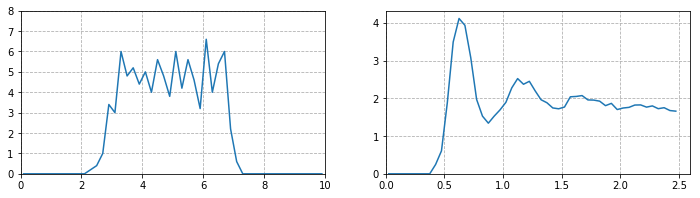

In [12]:
r_pr, pr_3 = compute_profile(sim_3, 0, 1, N_bins=50)
r_rdf, rdf_3 = compute_rdf(sim_3, 1, N_bins=50)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_3)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 8])

ax[1].plot(r_rdf, rdf_3)
ax[1].grid(ls="--")
ax[1].set_xlim(left=0)
ax[1].set_ylim(bottom=0);

### Increasing $B$ for solidification

Set a high value of $B$ and a low value of $A$.

In [13]:
N = 500
Nstep = 5000
L = [10, 5, 5]
dt = 0.008

B = 15.0
Nw = 3

sim_3 = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, steps=Nstep, thermo=100)

sim_3.create_particle_inputs(B=B)
sim_3.ip_N_wrap[1] = Nw
sim_3.Rd[-1, -1] = 0.60
sim_3.ip_A[-1, -1] = -60.0

In [14]:
sim_3.minimise(Nit=10, w=1e-5)

Minimising... Initial PE: 1.911e+05
step time pe
10 4 -4.233e+03
Done. Time: 4.41 s


In [15]:
sim_3.run()

step time temp ke pe p pxx pyy pzz
100 3 2.77524 2.077e+03 -8.859e+03 -5.719e+00 -7.458e+00 -7.236e+00 -2.463e+00
200 6 2.33755 1.750e+03 -1.144e+04 -8.321e-01 -9.151e-01 -1.714e+00 1.329e-01
300 9 1.86299 1.394e+03 -1.278e+04 4.214e-01 2.602e+00 1.741e+00 -3.079e+00
400 12 1.65052 1.235e+03 -1.347e+04 1.199e+00 2.527e+00 7.738e-01 2.967e-01
500 15 1.52609 1.142e+03 -1.402e+04 -6.602e-01 4.050e-01 -6.103e-01 -1.775e+00
600 18 1.29133 9.666e+02 -1.436e+04 -1.449e+00 -2.460e-03 -2.143e+00 -2.202e+00
700 22 1.27425 9.538e+02 -1.453e+04 -4.573e+00 -3.564e+00 -6.165e+00 -3.989e+00
800 25 1.27546 9.547e+02 -1.477e+04 -1.920e+00 -1.060e+00 -1.231e+00 -3.469e+00
900 28 1.30165 9.743e+02 -1.489e+04 -2.579e+00 -1.908e+00 -2.640e+00 -3.189e+00
1000 31 1.19616 8.953e+02 -1.492e+04 -2.367e+00 3.055e+00 -4.390e+00 -5.765e+00
1100 35 1.17949 8.829e+02 -1.500e+04 -6.038e+00 -2.913e+00 -6.586e+00 -8.613e+00
1200 38 1.24242 9.300e+02 -1.510e+04 -3.332e-01 1.551e+00 -3.277e+00 7.265e-01
1300 41 1.22383 9

Time: 0.15 s


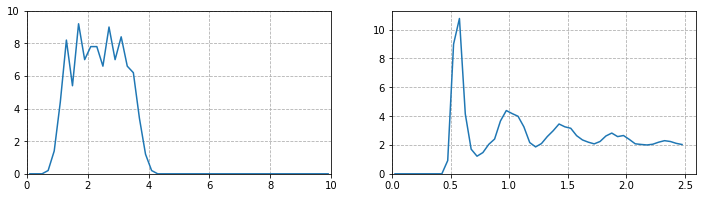

In [16]:
r_pr, pr_3 = compute_profile(sim_3, 0, 1, N_bins=50)
r_rdf, rdf_3 = compute_rdf(sim_3, 1, N_bins=50)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_3)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 10])

ax[1].plot(r_rdf, rdf_3)
ax[1].grid(ls="--")
ax[1].set_xlim(left=0)
ax[1].set_ylim(bottom=0);

## $N_w$ = 4

In [17]:
N = 500
Nstep = 6000
L = [10, 5, 5]
dt = 0.005

B = 2.0
Nw = 4

sim_4 = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, steps=Nstep, thermo=200)

sim_4.create_particle_inputs(B=B)
sim_4.ip_N_wrap[1] = Nw

In [18]:
sim_4.compute_local_density()
print(sim_4.rho2[:10].T.round(1))
sim_4.rho2.mean().round(2)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [3.3 1.  5.5 1.4 1.7 1.9 0.2 1.8 0.2 2.2]]


0.98

In [19]:
sim_4.compute_pe()

42227.45290382511

In [20]:
sim_4.run()

step time temp ke pe p pxx pyy pzz
200 6 19.23738 1.440e+04 -1.859e+03 4.563e+01 4.454e+01 4.631e+01 4.606e+01
400 12 4.89983 3.668e+03 -2.557e+03 7.292e+00 6.822e+00 8.803e+00 6.252e+00
600 18 2.31598 1.734e+03 -3.302e+03 4.854e-01 -5.821e-01 1.337e+00 7.011e-01
800 24 1.67215 1.252e+03 -4.075e+03 -6.786e-02 -5.310e-01 -1.559e-01 4.833e-01
1000 30 1.28141 9.591e+02 -4.544e+03 -2.990e+00 -3.122e+00 -3.452e+00 -2.395e+00
1200 36 1.14351 8.559e+02 -4.796e+03 8.166e-02 1.401e-01 3.843e-01 -2.795e-01
1400 43 1.13840 8.521e+02 -4.981e+03 -1.403e+00 -9.241e-01 2.399e-03 -3.288e+00
1600 49 1.09574 8.202e+02 -5.156e+03 1.305e+00 2.268e+00 2.501e-02 1.621e+00
1800 55 1.06727 7.989e+02 -5.329e+03 3.649e-01 3.236e+00 -2.256e+00 1.157e-01
2000 61 1.06255 7.953e+02 -5.300e+03 -9.861e-01 -1.405e+00 -1.490e+00 -6.284e-02
2200 68 0.95175 7.124e+02 -5.298e+03 -4.689e-01 1.096e+00 -2.182e+00 -3.204e-01
2400 74 1.05734 7.914e+02 -5.414e+03 2.944e-01 6.035e-01 -5.632e-02 3.361e-01
2600 81 1.04830 7.847e+0

In [21]:
sim_4.rho2.mean().round(2)

0.61

Time: 0.15 s


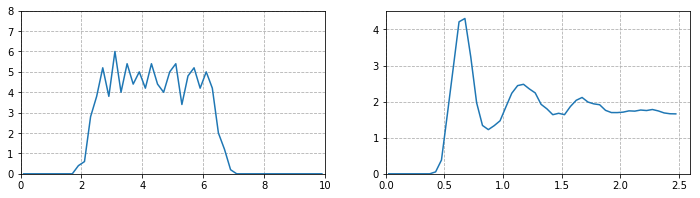

In [22]:
r_pr, pr_4 = compute_profile(sim_4, 0, 1, N_bins=50)
r_rdf, rdf_4 = compute_rdf(sim_4, 1, N_bins=50)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_4)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 8])

ax[1].plot(r_rdf, rdf_4)
ax[1].grid(ls="--")
ax[1].set_xlim(left=0)
ax[1].set_ylim(bottom=0);

## $N_w=5$

In [23]:
N = 500
Nstep = 6000
L = [10, 5, 5]
dt = 5e-3

B = 2.0
Nw = 5

sim_5 = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, \
                 steps=Nstep, thermo=50)

sim_5.create_particle_inputs(B=B)
sim_5.ip_N_wrap[1] = Nw

X0 = sim_5.X.copy()

In [24]:
sim_5.compute_local_density()
sim_5.rho2.T.max().round(2)

8.22

In [25]:
sim_5.compute_pe()

223389.3418369877

In [26]:
sim_5.minimise(Nit=50, w=1e-7)

Minimising... Initial PE: 2.234e+05
step time pe
10 2 6.236e+04
20 4 3.777e+04
30 6 2.715e+04
40 8 2.108e+04
50 10 1.711e+04
Done. Time: 10.99 s


In [27]:
sim_5.run()

step time temp ke pe p pxx pyy pzz
 50 1 14.85801 1.112e+04 -2.048e+03 4.063e+01 4.059e+01 4.164e+01 3.968e+01
100 3 10.61085 7.942e+03 -2.376e+03 2.277e+01 2.259e+01 2.233e+01 2.337e+01
150 4 7.62018 5.704e+03 -2.522e+03 1.574e+01 1.837e+01 1.638e+01 1.246e+01
200 6 5.44528 4.076e+03 -2.633e+03 8.548e+00 8.326e+00 9.535e+00 7.784e+00
250 7 4.14208 3.100e+03 -2.759e+03 5.497e+00 6.486e+00 4.495e+00 5.512e+00
300 9 3.30208 2.472e+03 -2.893e+03 5.999e+00 6.088e+00 6.021e+00 5.889e+00
350 10 2.71677 2.034e+03 -2.999e+03 8.822e-01 1.416e+00 -2.501e-01 1.481e+00
400 12 2.30483 1.725e+03 -3.190e+03 1.065e+00 3.778e-01 1.552e+00 1.266e+00
450 14 2.01213 1.506e+03 -3.369e+03 -1.745e+00 -1.691e+00 -3.038e+00 -5.053e-01
500 15 1.79312 1.342e+03 -3.533e+03 -1.182e+00 -1.048e+00 -1.013e+00 -1.485e+00
550 17 1.71737 1.285e+03 -3.793e+03 -1.614e-01 1.698e-01 3.019e-01 -9.559e-01
600 18 1.51387 1.133e+03 -3.890e+03 -3.019e+00 -2.953e+00 -2.909e+00 -3.195e+00
650 20 1.45016 1.085e+03 -4.069e+03 -1.161

5200 166 0.99690 7.462e+02 -5.409e+03 4.518e-01 1.892e+00 -3.859e-01 -1.507e-01
5250 168 0.93182 6.975e+02 -5.374e+03 1.489e+00 3.913e+00 -9.384e-01 1.494e+00
5300 170 1.02586 7.679e+02 -5.397e+03 -2.688e+00 -2.290e+00 -3.075e+00 -2.699e+00
5350 171 0.98908 7.403e+02 -5.362e+03 5.554e-01 7.024e-01 4.794e-01 4.844e-01
5400 173 0.96441 7.219e+02 -5.358e+03 -1.473e+00 -2.941e-01 -1.771e+00 -2.354e+00
5450 174 0.97784 7.319e+02 -5.295e+03 -1.584e+00 3.036e-02 -2.833e+00 -1.949e+00
5500 176 1.00902 7.552e+02 -5.363e+03 -3.746e-01 6.023e-02 -1.278e+00 9.425e-02
5550 178 1.01668 7.610e+02 -5.345e+03 4.740e-02 1.115e+00 -1.246e-01 -8.483e-01
5600 179 1.04463 7.819e+02 -5.364e+03 -1.425e+00 -4.469e-01 -1.204e+00 -2.625e+00
5650 181 0.99169 7.423e+02 -5.376e+03 -2.935e+00 -2.631e+00 -2.602e+00 -3.573e+00
5700 183 1.03205 7.725e+02 -5.378e+03 1.493e+00 1.718e+00 2.069e+00 6.929e-01
5750 184 1.02867 7.700e+02 -5.347e+03 -2.694e+00 -3.197e+00 -2.169e+00 -2.717e+00
5800 186 1.00767 7.542e+02 -5.340e

Time: 0.14 s


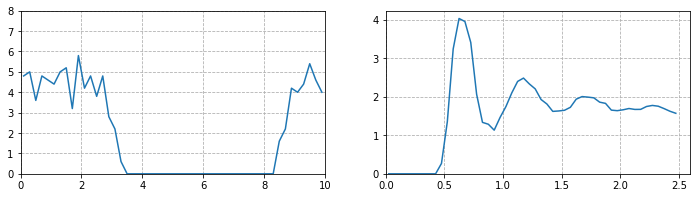

In [28]:
r_pr, pr_5 = compute_profile(sim_5, 0, 1, N_bins=50)
r_rdf, rdf_5 = compute_rdf(sim_5, 1, N_bins=50)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_5)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 8])

ax[1].plot(r_rdf, rdf_5)
ax[1].grid(ls="--")
ax[1].set_xlim(left=0)
ax[1].set_ylim(bottom=0);